In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

# Load Dataset

In [2]:
dataset = pd.read_csv('dataset/UNTR.JK.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-05,455.351990,455.351990,441.553986,450.752991,268.595093,3712344.0
1,2000-09-06,441.553986,464.552002,436.954010,455.351990,271.335541,6793100.0
2,2000-09-07,450.752991,459.951996,446.153015,455.351990,271.335541,5011393.0
3,2000-09-08,450.752991,455.351990,446.153015,450.752991,268.595093,2277955.0
4,2000-09-11,441.553986,441.553986,427.755005,432.355011,257.632050,978363.0


# Exploratory Data Analysis

#### Cek Deskripsi Statistik Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4979 non-null   object 
 1   Open       4951 non-null   float64
 2   High       4951 non-null   float64
 3   Low        4951 non-null   float64
 4   Close      4951 non-null   float64
 5   Adj Close  4951 non-null   float64
 6   Volume     4951 non-null   float64
dtypes: float64(6), object(1)
memory usage: 272.4+ KB


In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4.951000e+03
mean,13847.421073,14042.026645,13640.123164,13844.281991,10947.245831,7.760063e+06
std,10597.624681,10723.678319,10451.275601,10588.450195,9178.432487,1.292129e+07
min,183.981003,193.179993,165.582993,183.981003,109.630775,0.000000e+00
25%,3219.659912,3300.154907,3196.669922,3231.719971,1994.770508,2.733350e+06
50%,15600.000000,15825.000000,15334.799805,15600.000000,12163.294922,4.409699e+06
75%,21675.000000,21950.000000,21350.000000,21677.599610,16693.562500,7.853000e+06
max,40425.000000,40500.000000,39950.000000,40425.000000,35685.964844,2.262818e+08


In [5]:
dataset.shape

(4979, 7)

In [6]:
dataset.rename(columns={'Adj Close': 'Adj_close'}, inplace=True)

#### Check Missing Values

In [7]:
dataset.isnull().sum()

Date          0
Open         28
High         28
Low          28
Close        28
Adj_close    28
Volume       28
dtype: int64

In [8]:
dataset = dataset.dropna()

#### Check Zero Value in Dataset

In [9]:
print("Nilai 0 di kolom Open ada: ", (dataset.Open == 0).sum())
print("Nilai 0 di kolom High ada: ", (dataset.High == 0).sum())
print("Nilai 0 di kolom Low ada: ", (dataset.Low == 0).sum())
print("Nilai 0 di kolom Close ada: ", (dataset.Close == 0).sum())
print("Nilai 0 di kolom Adj Close ada: ", (dataset.Adj_close == 0).sum())
print("Nilai 0 di kolom Volume ada: ", (dataset.Volume == 0).sum())

Nilai 0 di kolom Open ada:  0
Nilai 0 di kolom High ada:  0
Nilai 0 di kolom Low ada:  0
Nilai 0 di kolom Close ada:  0
Nilai 0 di kolom Adj Close ada:  0
Nilai 0 di kolom Volume ada:  165


In [10]:
dataset = dataset[dataset.Volume != 0]

#### Check Outliers

<Axes: xlabel='Open'>

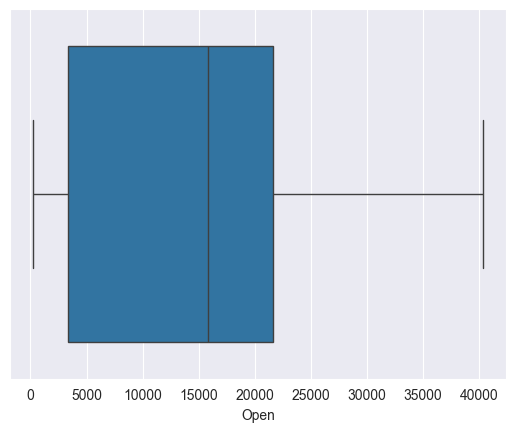

In [11]:
sns.boxplot(x=dataset['Open'])

<Axes: xlabel='High'>

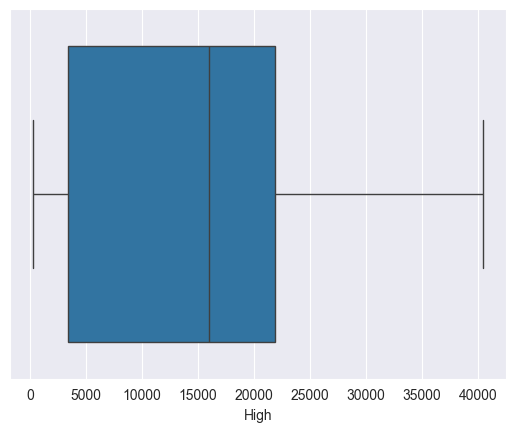

In [12]:
sns.boxplot(x=dataset['High'])

<Axes: xlabel='Low'>

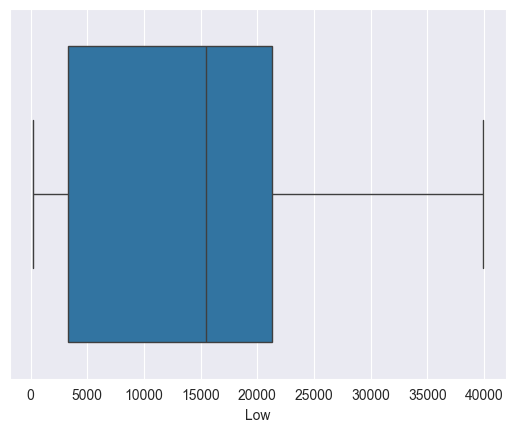

In [13]:
sns.boxplot(x=dataset['Low'])

<Axes: xlabel='Volume'>

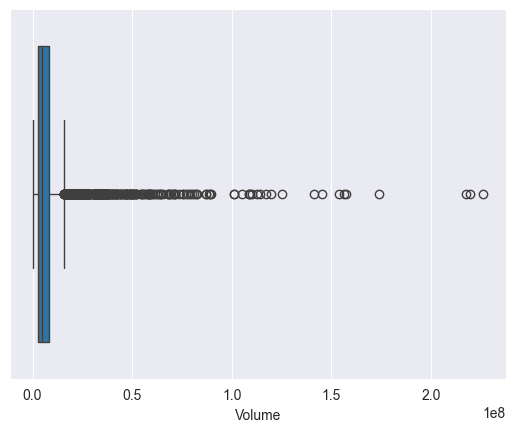

In [14]:
sns.boxplot(x=dataset['Volume'])

#### Check Correlation

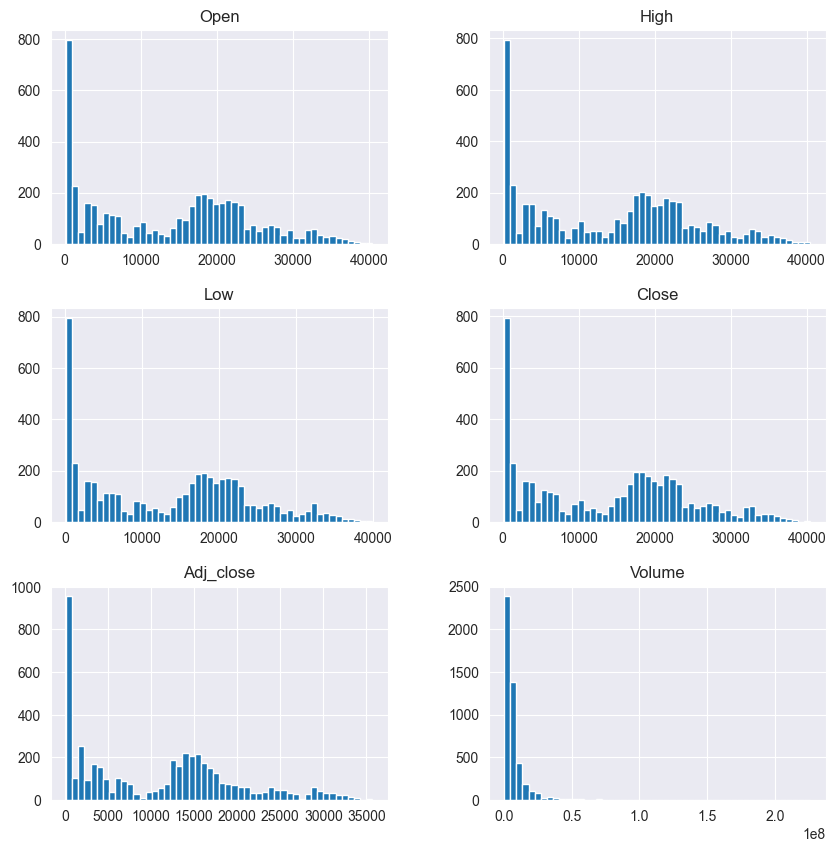

In [15]:
dataset.hist(bins=50, figsize=(10, 10))
plt.show()

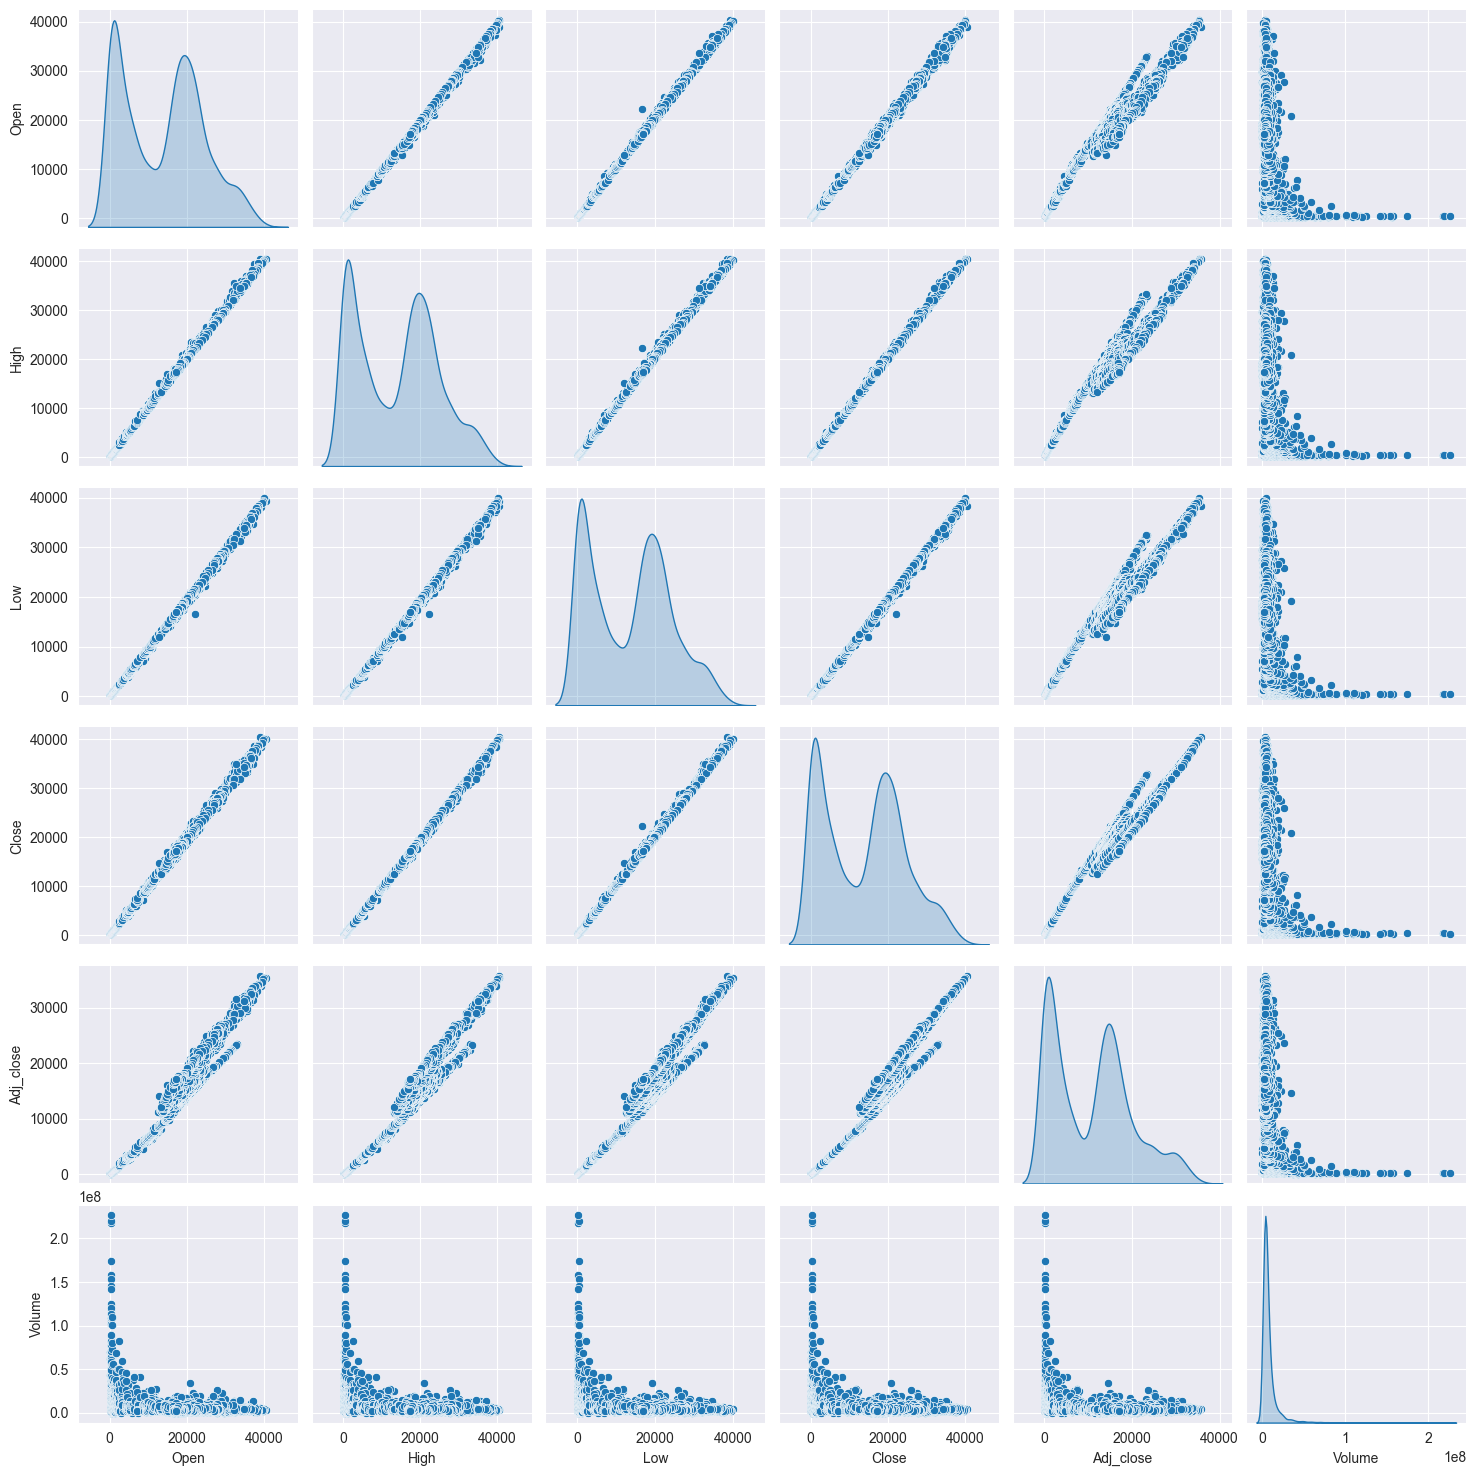

In [16]:
sns.pairplot(dataset, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

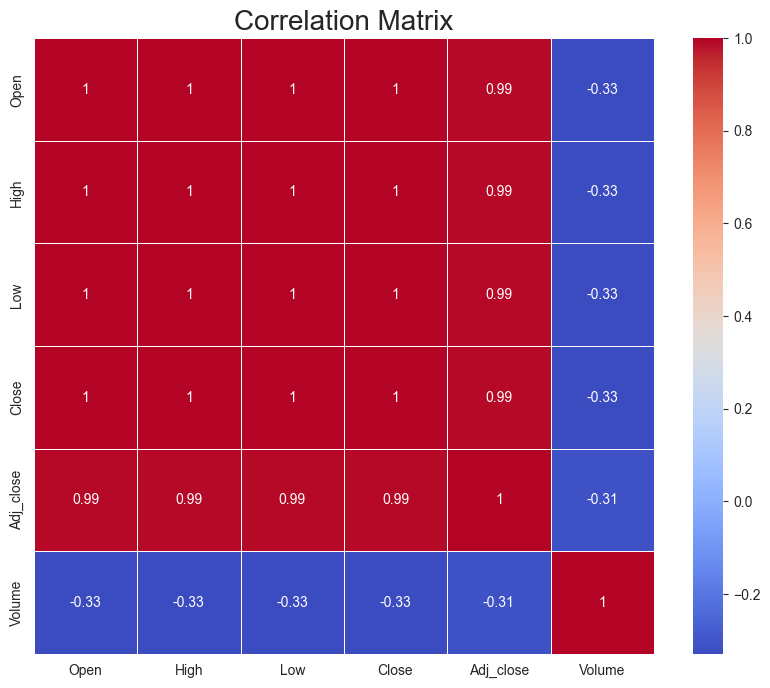

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr(numeric_only=True).round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

In [18]:
dataset.drop(['Volume', 'Adj_close'], axis=1, inplace=True)
dataset.head()

,Date,Open,High,Low,Close
0,2000-09-05,455.351990,455.351990,441.553986,450.752991
1,2000-09-06,441.553986,464.552002,436.954010,455.351990
2,2000-09-07,450.752991,459.951996,446.153015,455.351990
3,2000-09-08,450.752991,455.351990,446.153015,450.752991
4,2000-09-11,441.553986,441.553986,427.755005,432.355011


# Data Preparation

#### Sederhanakan Fitur dengan PCA

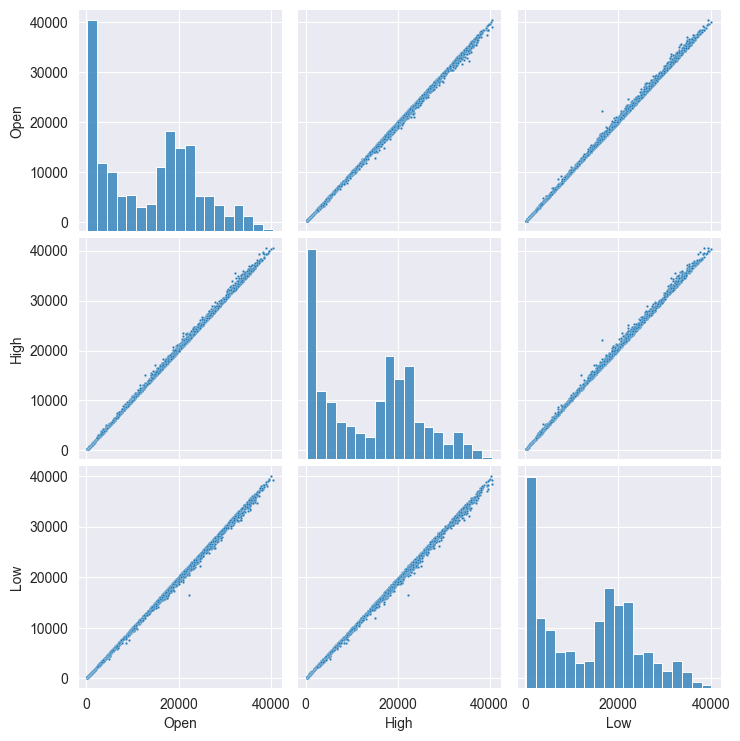

In [19]:
sns.pairplot(dataset[['Open', 'High', 'Low']], plot_kws={'s':3})

In [20]:
pca = PCA(n_components=3, random_state=42)
pca.fit(dataset[['Open', 'High', 'Low']])
principalComponents = pca.transform(dataset[['Open', 'High', 'Low']])

In [21]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [22]:
pca = PCA(n_components=1, random_state=42)
pca.fit(dataset[['Open', 'High', 'Low']])
dataset['pca'] = pca.transform(dataset.loc[:, ('Open', 'High', 'Low')]).flatten()
dataset.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [23]:
dataset.head()

,Date,Close,pca
0,2000-09-05,450.752991,-23197.602870
1,2000-09-06,455.351990,-23202.810865
2,2000-09-07,455.351990,-23194.950923
3,2000-09-08,450.752991,-23197.641857
4,2000-09-11,432.355011,-23221.500786


#### Split Data

In [24]:
X = dataset.drop(['Close', 'Date'], axis=1)
y = dataset['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling Data

In [25]:
scaler = StandardScaler()
X_train['pca'] = scaler.fit_transform(X_train)

In [26]:
X_train

,pca
3450,0.865004
2792,0.783737
3096,0.540026
4558,1.943040
4815,0.751276
...,...
4606,1.293827
503,-1.303523
3215,0.266065
3900,0.134465


# Model Development

In [27]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['LinearRegression', 'KNN', 'RandomForest', 'Boosting'])

#### Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=lr.predict(X_train), y_true=y_train)

#### KNN

In [29]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

#### Random Forest

In [30]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

#### Adaptive Boosting

In [31]:
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=ada.predict(X_train), y_true=y_train)

# Model Evaluation

#### Scaling Data Test

In [32]:
X_test['pca'] = scaler.fit_transform(X_test)

#### MSE Dari Tiap Model

In [33]:
mse = pd.DataFrame(index=['train', 'test'], 
                   columns=['LinearRegression', 'KNN', 'RandomForest', 'AdaptiveBoosting'])

model_dict = {'LinearRegression': lr, 'KNN': knn, 'RandomForest': rf, 'AdaptiveBoosting': ada}

for model_name, model in model_dict.items():
    mse.loc['train', model_name] = mean_squared_error(y_pred=model.predict(X_train), y_true=y_train)/1e3
    mse.loc['test', model_name] = mean_squared_error(y_pred=model.predict(X_test), y_true=y_test)/1e3

In [34]:
mse

,LinearRegression,KNN,RandomForest,AdaptiveBoosting
train,51.915217,43.19735,90.2777,417.142495
test,448.581461,451.612618,518.318097,676.140696


#### Plot MSE

Text(0, 0.5, 'MSE')

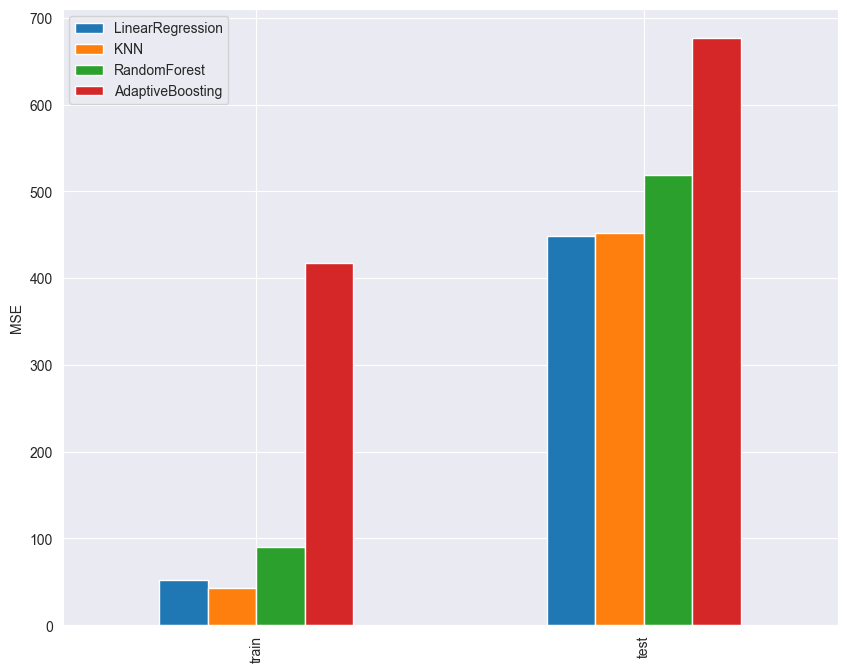

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
mse.plot(kind='bar', ax=ax)
ax.set_ylabel('MSE')

#### Prediction

In [36]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_KNN,prediksi_RandomForest,prediksi_AdaptiveBoosting
3019,21800.000000,21164.4,20952.8,21057.5,21651.6
4615,26425.000000,25713.2,25660.0,25472.1,25987.7
2427,18699.800781,18123.8,18122.6,18447.1,17718.9
822,758.921021,1380.3,1379.9,1354.3,1649.1
4573,29000.000000,28615.0,28165.0,28177.6,28091.7
